In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def func(x):
    #return np.sin(-np.sum(x)*50.)
    #return np.exp(-np.sum(x-0.5)**2./10)#the sum sums x's. I do this just to prove that I can use any number of dimensions.
    #return ( np.exp(-x[0]**2)+np.sin(x[1]) )*np.tanh(np.sum(x[2:]))
    return np.sum(x)#the integral from 0 to 1 is Ndim/2.
    
    
#The actual Monte Carlo algorithm.    
def MC(func,Ndim,Nt=1000):
    s=[]
    for i in range(Nt):
        x=np.random.rand(Ndim)#get x for every dimension.
        s.append(func(x))
    return np.mean(s), np.var(s,ddof=1)/Nt


In [56]:
Ndim=500#Number of dimensions (easy!!).

N_tot=500
N_batches=1000
I=[]
V=[]
for i in np.arange(N_batches):
    _I,_V=MC(func,Ndim,N_tot)
    I.append(_I)
    V.append(_V)
    if np.mod(i,50)==0:
        print 'i='+str(i)+':\t', 'integral estimate', _I, '+/-', np.sqrt(_V) 

integral=np.mean(I)#You can also use the least squares estimator (see the scripts in Accept-Reject).
sigma= np.sqrt(np.mean(V))#the variance of the estimator I is sigma^2= 1/N_batches sum_i var(I_i) (the mean var(I_i))
chi=(I-np.mean(I))/np.sqrt(V)

print 
print 'integral', integral
print 'sigma', sigma
print 'chi^2/dof',np.sum(chi**2)/(N_batches-1.)

i=0:	integral estimate 250.2720445567315 +/- 0.30987070873047
i=50:	integral estimate 250.04174675013613 +/- 0.2951017278331071
i=100:	integral estimate 250.1312993250474 +/- 0.2960933454569649
i=150:	integral estimate 249.7184497053007 +/- 0.283298643241544
i=200:	integral estimate 249.83681277539793 +/- 0.29822842784832865
i=250:	integral estimate 250.46446598810212 +/- 0.277113696393004
i=300:	integral estimate 250.3720410834621 +/- 0.27881019315608446
i=350:	integral estimate 249.90883176663758 +/- 0.2900716591044872
i=400:	integral estimate 249.98173776475875 +/- 0.28424790267134925
i=450:	integral estimate 249.87661245565874 +/- 0.3000909032335925
i=500:	integral estimate 250.4430888220982 +/- 0.28756044945066284
i=550:	integral estimate 249.63050393572573 +/- 0.3061544691396704
i=600:	integral estimate 249.99977722746627 +/- 0.2855992189451335
i=650:	integral estimate 250.2791780344175 +/- 0.2847140347124905
i=700:	integral estimate 250.16193137586063 +/- 0.2848293125219596
i=75

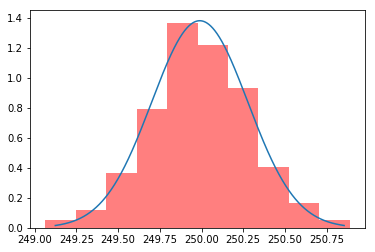

In [57]:
def _gauss(x,mu,sigma):
    return 1/(2*np.pi*sigma**2)**(1/2.)*np.exp(-(x-mu)**2/(2*sigma**2))
gauss=np.vectorize(_gauss)



'''
This plot shows the implication of the CLT.
As you can see, the histogram made by the results 
from the batches coincides with a gaussian with the estimated 
mean 
'''

#plot a gaussian with mean=I and variance=sigma (the variance of I).
x=np.arange(integral-3*sigma,integral+3*sigma,sigma/1000.) #plot +/- 3σ 
y=gauss(x,np.mean(I),sigma)
plt.plot(x,y)


#plot the histogram of a gauss sample of size N_batches with mean=I and variance=sigma (the variance of I) .
#plt.hist( np.random.normal(integral, sigma , N_batches),color='black',density=True)

plt.hist(I,alpha=0.5,color='r',density=True)

plt.show()